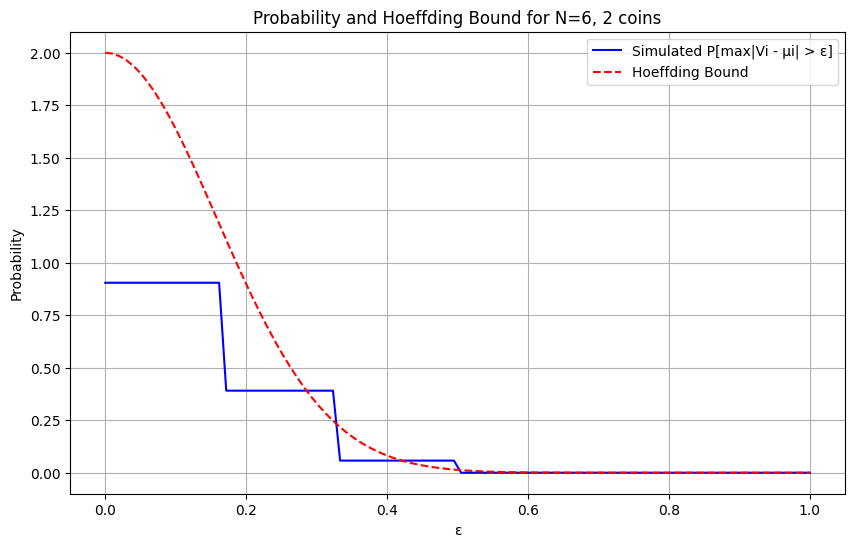

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def flip_coin(N):
    return sum(random.random() < 0.5 for _ in range(N)) / N

def simulate(num_simulations, N):
    results1 = [flip_coin(N) for _ in range(num_simulations)]
    results2 = [flip_coin(N) for _ in range(num_simulations)]
    return results1, results2

def compute_probabilities(results1, results2, E_values):
    probabilities = []
    for E in E_values:
        count = sum(max(abs(r1 - 0.5), abs(r2 - 0.5)) > E for r1, r2 in zip(results1, results2))
        probabilities.append(count / len(results1))
    return probabilities

N = 6
num_simulations = 10000
E_values = np.linspace(0, 1, 100)

results1, results2 = simulate(num_simulations, N)

probabilities = compute_probabilities(results1, results2, E_values)
hoeffding = 2 * np.exp(-2 * E_values**2 * 10)

plt.figure(figsize=(10, 6))
plt.plot(E_values, probabilities, label='Simulated P[max|Vi - μi| > ε]', color='blue')
plt.plot(E_values, hoeffding, label='Hoeffding Bound', color='red', linestyle='--')
plt.xlabel('ε')
plt.ylabel('Probability')
plt.title(f'Probability and Hoeffding Bound for N={N}, 2 coins')
plt.legend()
plt.grid(True)
plt.show()